In [63]:
import os
import pandas as pd
import numpy as np
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error


In [64]:
import pandas as pd

# Define file paths
file1_path = '../Data/TorrTrials/arp/combinedResult.csv'
file2_path = '../Data/TorrTrials/Dhruv/combinedResult.csv'
file3_path = '../Data/TorrTrials/Prasanna/combinedResult.csv'
file4_path = '../Data/TorrTrials/rnk/combinedResult.csv'

# Read each CSV file into a DataFrame
data1 = pd.read_csv(file1_path)
data2 = pd.read_csv(file2_path)
data3 = pd.read_csv(file3_path)
data4 = pd.read_csv(file4_path)

# Combine all DataFrames
combined_data = pd.concat([data1, data2, data3, data4], ignore_index=True)

# Save the combined data to a new CSV file
# combined_data.to_csv('combined_file.csv', index=False)  # Replace 'combined_file.csv' with your desired output name


In [65]:
PATH = "../Data/exp_2/combinedResult.csv"

def load_data(csv_path=PATH):
    return pd.read_csv(csv_path)

In [66]:
# data = load_data()
data = combined_data
data.head()

,currTime,s1,s2,s3,s4,s,AccX,AccY,AccZ,GyroX,...,Fx,Fy,Fz,Mx,My,Mz,Cx,Cy,Cz,Weight
0,14711,754.18,758.27,754.73,757.57,756.19,-215.82,-1025.88,333.01,0.34,...,5.19443,-6.451870,-27.3241,3507.19,-6999.14,2351.19,-256.289,-128.3930,0,70
1,14742,755.85,758.69,754.79,758.29,756.90,-35.64,-990.72,399.90,33.84,...,4.58888,-8.338240,-39.2639,4662.49,-8587.69,2404.75,-218.769,-118.7690,0,70
2,14773,758.30,759.12,754.98,758.66,757.76,109.86,-835.45,577.64,12.05,...,3.95106,-9.704820,-51.2587,5343.89,-9834.87,2809.59,-191.922,-104.2820,0,70
3,14804,761.97,759.41,755.08,759.25,758.93,-91.80,-945.80,397.46,18.98,...,6.34752,-6.923790,-64.8620,5218.11,-10957.00,2539.79,-168.935,-80.4628,0,70
4,14835,765.97,759.53,755.19,759.81,760.13,-111.33,-989.75,360.84,15.03,...,10.56410,-0.225128,-85.8131,5438.89,-12976.90,2298.55,-151.218,-63.3728,0,70


In [67]:
##### removing zero values so that data is not scattered highly

data = data[data['s'] != 0]

# Display the first few rows of the filtered dataset
data.head()



,currTime,s1,s2,s3,s4,s,AccX,AccY,AccZ,GyroX,...,Fx,Fy,Fz,Mx,My,Mz,Cx,Cy,Cz,Weight
0,14711,754.18,758.27,754.73,757.57,756.19,-215.82,-1025.88,333.01,0.34,...,5.19443,-6.451870,-27.3241,3507.19,-6999.14,2351.19,-256.289,-128.3930,0,70
1,14742,755.85,758.69,754.79,758.29,756.90,-35.64,-990.72,399.90,33.84,...,4.58888,-8.338240,-39.2639,4662.49,-8587.69,2404.75,-218.769,-118.7690,0,70
2,14773,758.30,759.12,754.98,758.66,757.76,109.86,-835.45,577.64,12.05,...,3.95106,-9.704820,-51.2587,5343.89,-9834.87,2809.59,-191.922,-104.2820,0,70
3,14804,761.97,759.41,755.08,759.25,758.93,-91.80,-945.80,397.46,18.98,...,6.34752,-6.923790,-64.8620,5218.11,-10957.00,2539.79,-168.935,-80.4628,0,70
4,14835,765.97,759.53,755.19,759.81,760.13,-111.33,-989.75,360.84,15.03,...,10.56410,-0.225128,-85.8131,5438.89,-12976.90,2298.55,-151.218,-63.3728,0,70


In [68]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6494 entries, 0 to 6493
Data columns (total 24 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   currTime  6494 non-null   int64  
 1   s1        6494 non-null   float64
 2   s2        6494 non-null   float64
 3   s3        6494 non-null   float64
 4   s4        6494 non-null   float64
 5   s         6494 non-null   float64
 6   AccX      6494 non-null   float64
 7   AccY      6494 non-null   float64
 8   AccZ      6494 non-null   float64
 9   GyroX     6494 non-null   float64
 10  GyroY     6494 non-null   float64
 11  GyroZ     6494 non-null   float64
 12  Frame     6494 non-null   int64  
 13  SubFrame  6494 non-null   int64  
 14  Fx        6494 non-null   float64
 15  Fy        6494 non-null   float64
 16  Fz        6494 non-null   float64
 17  Mx        6494 non-null   float64
 18  My        6494 non-null   float64
 19  Mz        6494 non-null   float64
 20  Cx        6494 non-null   floa

In [69]:
data.describe()

,currTime,s1,s2,s3,s4,s,AccX,AccY,AccZ,GyroX,...,Fx,Fy,Fz,Mx,My,Mz,Cx,Cy,Cz,Weight
count,6494.000000,6494.000000,6494.000000,6494.000000,6494.000000,6494.000000,6494.000000,6494.000000,6494.000000,6494.000000,...,6494.000000,6494.000000,6494.000000,6494.000000,6494.000000,6494.000000,6494.000000,6494.000000,6494.0,6494.000000
mean,42478.162304,798.839570,767.355561,755.075705,761.635119,770.726475,-39.340556,-887.911719,507.209729,-0.393395,...,32.609892,-1.767073,-326.272791,18195.855309,-20523.973121,1015.851738,-62.227012,-56.807272,0.0,65.643671
std,16466.561283,12.492602,2.750117,2.059243,5.366092,3.082478,24.665973,39.858541,65.100554,6.231987,...,20.733223,7.463278,67.481084,10187.817639,19786.718716,2232.150024,57.011231,30.907652,0.0,6.321675
min,13914.000000,750.770000,758.270000,751.840000,753.960000,754.510000,-374.510000,-1430.660000,265.620000,-180.430000,...,-26.232000,-34.795500,-711.927000,-8657.090000,-81265.500000,-6480.760000,-256.289000,-145.490000,0.0,56.000000
25%,28786.500000,791.062500,765.740000,753.320000,757.100000,769.010000,-51.760000,-924.800000,433.110000,-2.390000,...,20.174600,-5.269228,-352.863500,12132.600000,-37066.275000,-261.720000,-116.701000,-80.159650,0.0,60.000000
50%,41315.000000,798.360000,767.170000,754.350000,760.040000,770.580000,-41.500000,-880.860000,526.370000,-0.370000,...,33.522300,-1.802515,-323.367000,17382.500000,-23766.550000,1145.560000,-101.290000,-53.647250,0.0,70.000000
75%,54611.000000,806.017500,769.160000,757.150000,765.970000,772.360000,-27.340000,-858.400000,559.570000,1.670000,...,43.713475,1.561255,-293.098250,23788.575000,-2504.342500,2541.157500,-8.323935,-36.644275,0.0,70.000000
max,82042.000000,870.050000,775.790000,761.170000,783.240000,789.590000,493.160000,-704.590000,754.390000,59.560000,...,148.622000,99.068100,0.000000,57636.600000,10396.900000,10820.800000,24.785100,30.352400,0.0,72.000000


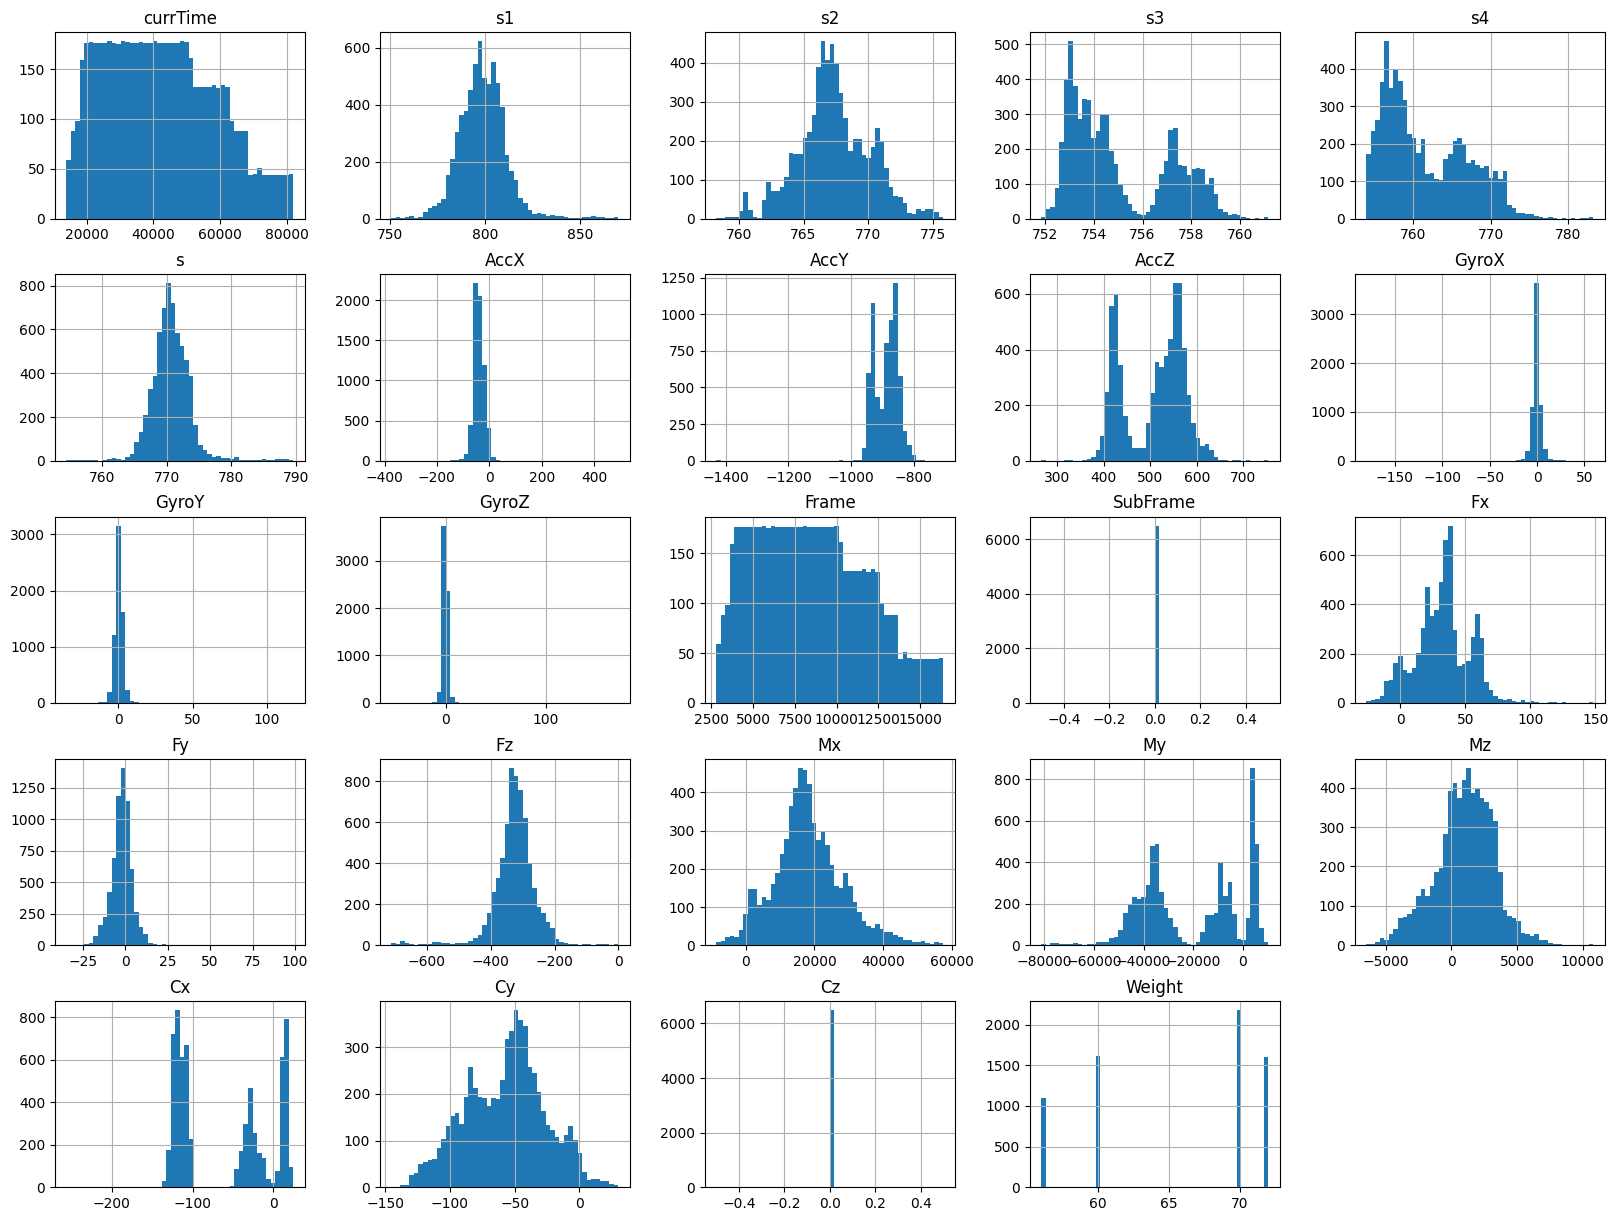

In [70]:
%matplotlib inline
# only in a Jupyter notebook
import matplotlib.pyplot as plt
data.hist(bins=50, figsize=(20,15))
plt.show()

In [71]:
data_labels = data["Fz"]
data.drop("Fz", axis=1)

,currTime,s1,s2,s3,s4,s,AccX,AccY,AccZ,GyroX,...,SubFrame,Fx,Fy,Mx,My,Mz,Cx,Cy,Cz,Weight
0,14711,754.18,758.27,754.73,757.57,756.19,-215.82,-1025.88,333.01,0.34,...,0,5.19443,-6.451870,3507.19,-6999.14,2351.19,-256.2890,-128.3930,0,70
1,14742,755.85,758.69,754.79,758.29,756.90,-35.64,-990.72,399.90,33.84,...,0,4.58888,-8.338240,4662.49,-8587.69,2404.75,-218.7690,-118.7690,0,70
2,14773,758.30,759.12,754.98,758.66,757.76,109.86,-835.45,577.64,12.05,...,0,3.95106,-9.704820,5343.89,-9834.87,2809.59,-191.9220,-104.2820,0,70
3,14804,761.97,759.41,755.08,759.25,758.93,-91.80,-945.80,397.46,18.98,...,0,6.34752,-6.923790,5218.11,-10957.00,2539.79,-168.9350,-80.4628,0,70
4,14835,765.97,759.53,755.19,759.81,760.13,-111.33,-989.75,360.84,15.03,...,0,10.56410,-0.225128,5438.89,-12976.90,2298.55,-151.2180,-63.3728,0,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6489,68262,826.73,769.61,753.24,757.89,776.87,-26.37,-904.79,511.23,-21.25,...,0,61.99030,94.222200,47072.10,-10015.90,6028.69,-20.5794,-96.7177,0,60
6490,68293,810.97,767.08,752.81,755.64,771.63,-35.64,-939.45,442.38,-67.66,...,0,59.64420,99.068100,44399.00,-9447.16,5669.16,-20.8284,-97.8877,0,60
6491,68324,781.51,762.04,752.79,754.97,762.83,401.37,-1300.29,631.35,-180.43,...,0,50.07000,88.532300,38823.40,-8443.56,4605.61,-22.2958,-102.5160,0,60
6492,68355,759.49,760.21,752.78,754.89,756.84,493.16,-1430.66,713.87,25.69,...,0,27.88060,53.736700,26741.10,-6761.62,2984.31,-29.5444,-116.8370,0,60


In [72]:
data.columns

Index(['currTime', 's1', 's2', 's3', 's4', 's', 'AccX', 'AccY', 'AccZ',
       'GyroX', 'GyroY', 'GyroZ', 'Frame', 'SubFrame', 'Fx', 'Fy', 'Fz', 'Mx',
       'My', 'Mz', 'Cx', 'Cy', 'Cz', 'Weight'],
      dtype='object')

Dimensionality Reduction for better performance

In [73]:
data = data.drop(["s", "currTime", "Frame","SubFrame","Fx","Fy","Fz","Mx","My","Mz","Cx","Cy","Cz","AccX","AccY","AccZ","GyroX","GyroY","GyroZ"], axis=1)
data.head()

,s1,s2,s3,s4,Weight
0,754.18,758.27,754.73,757.57,70
1,755.85,758.69,754.79,758.29,70
2,758.30,759.12,754.98,758.66,70
3,761.97,759.41,755.08,759.25,70
4,765.97,759.53,755.19,759.81,70


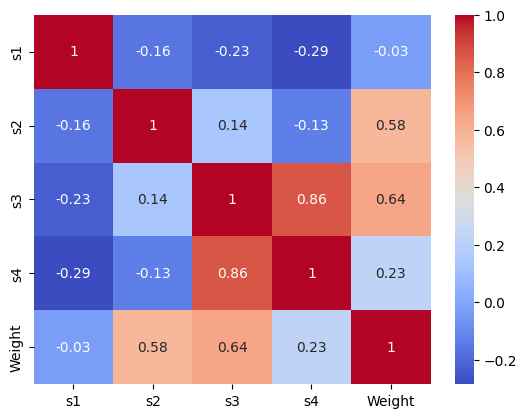

In [74]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'df' is your dataset
df = pd.DataFrame(data)

# Calculate correlation matrix
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

In [75]:
threshold = 0.8
high_corr_pairs = []

for column in corr_matrix.columns:
    for row in corr_matrix.index:
        if abs(corr_matrix.loc[row, column]) > threshold and row != column:
            high_corr_pairs.append((row, column, corr_matrix.loc[row, column]))

# Print pairs with high correlation
if high_corr_pairs:
    print("\nHighly correlated pairs (correlation > 0.8 or < -0.8):")
    for pair in high_corr_pairs:
        print(f"{pair[0]} and {pair[1]}: {pair[2]:.2f}")
else:
    print("\nNo highly correlated pairs (correlation > 0.8 or < -0.8) found.")


Highly correlated pairs (correlation > 0.8 or < -0.8):
s4 and s3: 0.86
s3 and s4: 0.86


In [76]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(data, test_size=0.2,
random_state=42)

train_labels, test_labels = train_test_split(data_labels,test_size=0.2,
random_state=42 )
## random_state ensures that same indices of split is produced every time

Standard correlation coefficiant tells the correlation between the desired vairbles with other vairables in the data set and gives insight of how a specific variable is related to the desired variable

In [77]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Define a pipeline with only the StandardScaler step
num_pipeline = Pipeline([
    ('std_scaler', StandardScaler()),
])

# Apply the pipeline to the numerical data

In [78]:
train_data_scaled = num_pipeline.fit_transform(train_set)
test_data_scaled = num_pipeline.fit_transform(test_set)

In [79]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(train_data_scaled, train_labels)

LinearRegression()

In [80]:
some_data = train_set.iloc[:5]
some_labels = train_labels.iloc[:5]
some_data_prepared = num_pipeline.fit_transform(some_data)
print("Predictions:", lin_reg.predict(some_data_prepared))

Predictions: [-323.08226037 -365.17946136 -345.99159379 -291.61337368 -303.95575131]


In [81]:
print("Labels:", list(some_labels))

Labels: [-357.467, -389.664, -374.18, -292.876, -330.241]


In [82]:
from sklearn.metrics import mean_squared_error
import numpy as np

housing_predictions = lin_reg.predict(train_data_scaled)
lin_mse = mean_squared_error(train_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

np.float64(26.853083297624284)

In [83]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(train_set, train_labels)

DecisionTreeRegressor()

In [84]:
import numpy as  np
from sklearn.metrics import mean_squared_error

housing_predictions = tree_reg.predict(train_data_scaled)
tree_mse = mean_squared_error(train_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

c:\Users\hcr lab pc\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


np.float64(253.65539783530903)

In [85]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(train_data_scaled, train_labels)

RandomForestRegressor()

In [86]:
some_data = train_set.iloc[:5]
some_labels = train_labels.iloc[:5]
some_data_prepared = num_pipeline.fit_transform(some_data)
# print("Predictions:", forest_reg.predict(some_data_prepared))

In [87]:
print("Labels:", list(some_labels))

Labels: [-357.467, -389.664, -374.18, -292.876, -330.241]


In [88]:
predictions = forest_reg.predict(train_data_scaled)
forest_mse = mean_squared_error(train_labels, predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

np.float64(7.38112965955635)

In [89]:
from sklearn.svm import SVR


print("\n--- Support Vector Regressor (SVR) ---")
svr_model = SVR(kernel='rbf')
svr_model.fit(train_data_scaled, train_labels)  # Use scaled data for SVR


--- Support Vector Regressor (SVR) ---


SVR()

In [90]:
some_data = train_set.iloc[:5]
some_labels = train_labels.iloc[:5]
some_data_prepared = num_pipeline.fit_transform(some_data)
# print("Predictions:", svr_model.predict(some_data_prepared))

In [91]:
print("Labels:", list(some_labels))

Labels: [-357.467, -389.664, -374.18, -292.876, -330.241]


In [92]:
predictions = svr_model.predict(train_data_scaled)
svr_mse = mean_squared_error(train_labels, predictions)
svr_rmse = np.sqrt(svr_mse)
svr_rmse

np.float64(43.60109769865755)

In [93]:
print("Linear Reg:", lin_reg.predict(some_data_prepared))
print("Decision tree:", tree_reg.predict(some_data_prepared))
print("random forest:", forest_reg.predict(some_data_prepared))
print("svr:", svr_model.predict(some_data_prepared),"\n\n")

print("Actual:", list(some_labels))

Linear Reg: [-323.08226037 -365.17946136 -345.99159379 -291.61337368 -303.95575131]
Decision tree: [-81.4591 -81.4591 -81.4591 -81.4591 -81.4591]
random forest: [-319.48086 -392.72474 -338.18478 -268.21151 -286.95086]
svr: [-322.67681022 -368.97462354 -342.56429229 -297.74493859 -301.61539513] 


Actual: [-357.467, -389.664, -374.18, -292.876, -330.241]


c:\Users\hcr lab pc\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


Increasing the performance of Random Forest by hyperparameter tuning

In [57]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}

grid_search = GridSearchCV(estimator=forest_reg, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', verbose=2)
grid_search.fit(train_data_scaled, train_labels)

# Best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Use the best estimator
forest_reg = grid_search.best_estimator_


Fitting 3 folds for each of 216 candidates, totalling 648 fits
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2

c:\Users\hcr lab pc\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
324 fits failed out of a total of 648.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
324 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\hcr lab pc\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\hcr lab pc\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
  File "c:\Users\hcr lab pc\AppData\Local\Programs\Python\Python312\Lib\site-p

Best Parameters: {'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}


In [94]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Make predictions
predictions = forest_reg.predict(test_data_scaled)

# Compute metrics
mse = mean_squared_error(test_labels, predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(test_labels, predictions)
r2 = r2_score(test_labels, predictions)

# Print metrics
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R² Score:", r2)


Mean Squared Error (MSE): 472.5151093654088
Root Mean Squared Error (RMSE): 21.737412664928843
Mean Absolute Error (MAE): 12.447119185527328
R² Score: 0.8957007072157193


In [95]:
some_data = test_set.iloc[:5]
some_labels = test_labels.iloc[:5]
some_data_prepared = num_pipeline.fit_transform(some_data)
# print("Predictions:", svr_model.predict(some_data_prepared))

In [96]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Assuming `y_test` is your actual values and you have predictions from each model
# e.g., lin_pred, tree_pred, forest_pred, svr_pred

# Calculate RMSE
lin_rmse = np.sqrt(mean_squared_error(some_labels, lin_reg.predict(some_data_prepared)))
tree_rmse = np.sqrt(mean_squared_error(some_labels, tree_reg.predict(some_data_prepared)))
forest_rmse = np.sqrt(mean_squared_error(some_labels, forest_reg.predict(some_data_prepared)))
svr_rmse = np.sqrt(mean_squared_error(some_labels, svr_model.predict(some_data_prepared)))

# Calculate R-squared as a measure of accuracy
lin_r2 = r2_score(some_labels, lin_reg.predict(some_data_prepared))
tree_r2 = r2_score(some_labels, tree_reg.predict(some_data_prepared))
forest_r2 = r2_score(some_labels, forest_reg.predict(some_data_prepared))
svr_r2 = r2_score(some_labels, svr_model.predict(some_data_prepared))

# Print RMSE and R-squared as accuracy percentage
print("Linear Regression RMSE:", lin_rmse, " | Accuracy:", lin_r2 * 100, "%")
print("Decision Tree RMSE:", tree_rmse, " | Accuracy:", tree_r2 * 100, "%")
print("Random Forest RMSE:", forest_rmse, " | Accuracy:", forest_r2 * 100, "%")
print("SVR RMSE:", svr_rmse, " | Accuracy:", svr_r2 * 100, "%\n")


Linear Regression RMSE: 24.34305495491856  | Accuracy: 83.41704826287533 %
Decision Tree RMSE: 232.30647173871418  | Accuracy: -1410.1994069064067 %
Random Forest RMSE: 39.53355781340476  | Accuracy: 56.26355512700839 %
SVR RMSE: 22.232951341641204  | Accuracy: 86.16733329776977 %



c:\Users\hcr lab pc\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
c:\Users\hcr lab pc\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


In [103]:
exp1 = pd.read_csv('../Data/TorrTrials/Dharmesh/combinedResult.csv')
exp1.head()

,currTime,s1,s2,s3,s4,s,AccX,AccY,AccZ,GyroX,...,Fx,Fy,Fz,Mx,My,Mz,Cx,Cy,Cz,Weight
0,10933,753.11,767.04,757.07,760.07,759.32,-41.50,-1004.39,252.93,33.02,...,2.99292,2.70722,-27.4957,242.428,-1332.24,86.8712,-547.447,-8.83537,0,72
1,10964,753.13,767.57,757.27,760.87,759.71,-71.78,-997.56,300.78,34.79,...,5.38603,4.27523,-36.2130,364.264,-1485.87,81.7844,-540.031,-10.05760,0,72
2,10995,753.92,768.25,757.74,761.84,760.44,-159.67,-829.59,600.59,33.80,...,8.63440,2.88159,-46.3032,621.342,-1724.26,438.9400,-536.261,-13.41550,0,72
3,11026,755.37,769.40,758.10,762.51,761.34,-114.26,-870.61,553.22,53.29,...,12.40370,3.39761,-61.0527,949.118,-1867.05,598.1720,-529.581,-15.53750,0,72
4,11056,757.14,771.00,758.35,762.89,762.34,-18.07,-918.46,462.89,26.05,...,12.95860,1.86141,-86.5583,2992.850,-2993.11,387.1560,-533.571,-34.55330,0,72


In [104]:
exp1 = exp1[exp1['s'] != 0]

# Display the first few rows of the filtered dataset
exp1.head()

,currTime,s1,s2,s3,s4,s,AccX,AccY,AccZ,GyroX,...,Fx,Fy,Fz,Mx,My,Mz,Cx,Cy,Cz,Weight
0,10933,753.11,767.04,757.07,760.07,759.32,-41.50,-1004.39,252.93,33.02,...,2.99292,2.70722,-27.4957,242.428,-1332.24,86.8712,-547.447,-8.83537,0,72
1,10964,753.13,767.57,757.27,760.87,759.71,-71.78,-997.56,300.78,34.79,...,5.38603,4.27523,-36.2130,364.264,-1485.87,81.7844,-540.031,-10.05760,0,72
2,10995,753.92,768.25,757.74,761.84,760.44,-159.67,-829.59,600.59,33.80,...,8.63440,2.88159,-46.3032,621.342,-1724.26,438.9400,-536.261,-13.41550,0,72
3,11026,755.37,769.40,758.10,762.51,761.34,-114.26,-870.61,553.22,53.29,...,12.40370,3.39761,-61.0527,949.118,-1867.05,598.1720,-529.581,-15.53750,0,72
4,11056,757.14,771.00,758.35,762.89,762.34,-18.07,-918.46,462.89,26.05,...,12.95860,1.86141,-86.5583,2992.850,-2993.11,387.1560,-533.571,-34.55330,0,72


In [105]:
exp1_labels = exp1["Fz"]
exp1.drop("Fz", axis=1)

,currTime,s1,s2,s3,s4,s,AccX,AccY,AccZ,GyroX,...,SubFrame,Fx,Fy,Mx,My,Mz,Cx,Cy,Cz,Weight
0,10933,753.11,767.04,757.07,760.07,759.32,-41.50,-1004.39,252.93,33.02,...,0,2.99292,2.707220,242.428,-1332.24,86.8712,-547.447,-8.83537,0,72
1,10964,753.13,767.57,757.27,760.87,759.71,-71.78,-997.56,300.78,34.79,...,0,5.38603,4.275230,364.264,-1485.87,81.7844,-540.031,-10.05760,0,72
2,10995,753.92,768.25,757.74,761.84,760.44,-159.67,-829.59,600.59,33.80,...,0,8.63440,2.881590,621.342,-1724.26,438.9400,-536.261,-13.41550,0,72
3,11026,755.37,769.40,758.10,762.51,761.34,-114.26,-870.61,553.22,53.29,...,0,12.40370,3.397610,949.118,-1867.05,598.1720,-529.581,-15.53750,0,72
4,11056,757.14,771.00,758.35,762.89,762.34,-18.07,-918.46,462.89,26.05,...,0,12.95860,1.861410,2992.850,-2993.11,387.1560,-533.571,-34.55330,0,72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
809,35956,756.15,770.63,757.88,758.22,760.72,104.49,-937.01,400.88,-42.48,...,0,25.04070,5.538690,6530.250,-5183.30,-128.7930,-530.173,-39.23000,0,72
810,35987,755.33,769.78,757.18,757.80,760.02,568.36,-1003.42,554.69,-26.67,...,0,12.48910,0.276389,1863.600,-3164.54,-602.3670,-530.146,-18.26620,0,72
811,36017,755.39,769.34,757.06,757.72,759.88,421.39,-1065.92,518.07,-5.44,...,0,4.92244,-5.514560,159.553,-1480.79,-310.7540,-529.032,-3.26793,0,72
812,41148,793.65,776.17,758.48,764.39,773.17,-40.04,-895.02,513.67,1.44,...,0,0.00000,0.000000,0.000,0.00,0.0000,-499.000,0.00000,0,72


In [106]:
exp1= exp1.drop(["s", "currTime", "Frame","SubFrame","Fx","Fy","Fz","Mx","My","Mz","Cx","Cy","Cz","AccX","AccY","AccZ","GyroX","GyroY","GyroZ"], axis=1)
exp1.head()

,s1,s2,s3,s4,Weight
0,753.11,767.04,757.07,760.07,72
1,753.13,767.57,757.27,760.87,72
2,753.92,768.25,757.74,761.84,72
3,755.37,769.40,758.10,762.51,72
4,757.14,771.00,758.35,762.89,72


In [107]:
exp1_scaled = num_pipeline.fit_transform(exp1)

c:\Users\hcr lab pc\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


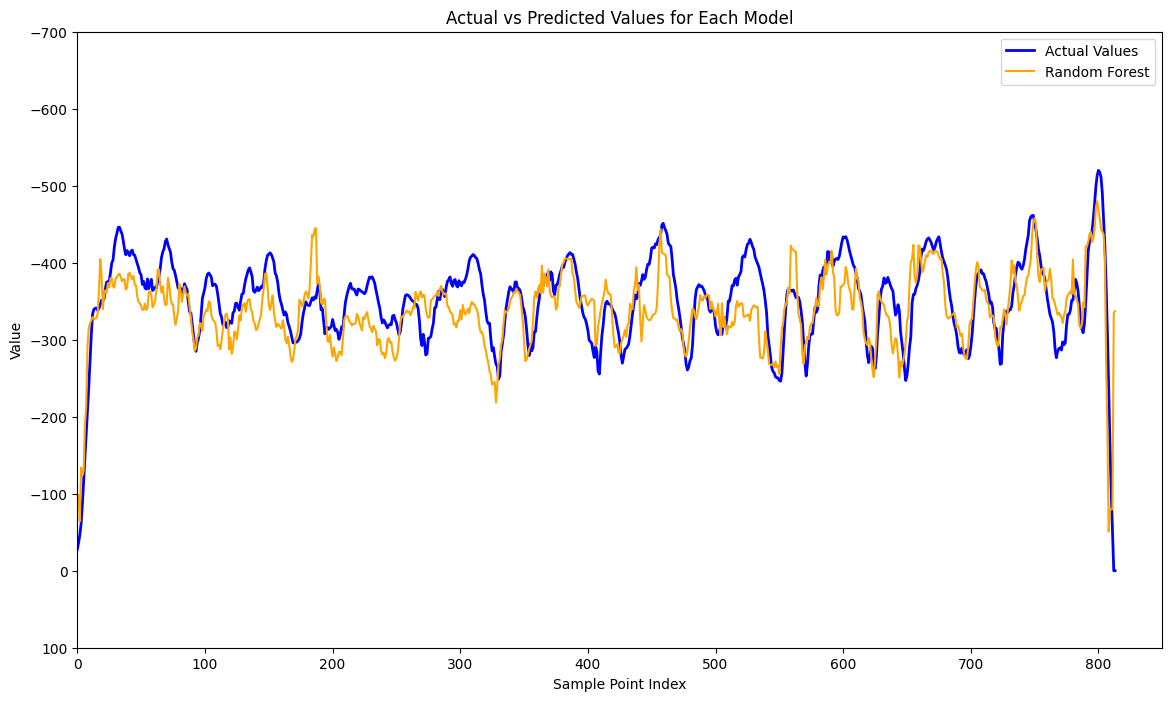

In [109]:
import matplotlib.pyplot as plt

# Assuming `y_test` are the actual labels and predictions are saved for each mode
lin_pred_sample = lin_reg.predict(exp1_scaled)
tree_pred_sample = tree_reg.predict(exp1_scaled)
forest_pred_sample = forest_reg.predict(exp1_scaled)
svr_pred_sample = svr_model.predict(exp1_scaled)

# Plot actual vs predicted values as continuous lines
plt.figure(figsize=(14, 8))

plt.plot(exp1_labels, label="Actual Values", color='blue', linestyle='-', linewidth=2)  # Solid blue for actual values
plt.plot(forest_pred_sample, label="Random Forest", color='orange', linestyle='-', linewidth=1.5)  # Solid orange for Random Forest predictions
# plt.plot(lin_pred_sample, label="Linear Regression", color='orange', linestyle='-', linewidth=1.5)
# plt.plot(svr_pred_sample, label="SVR", color='orange', linestyle='-', linewidth=1.5)
plt.xlim(0, 850)
plt.ylim(100,-700)
plt.xlabel("Sample Point Index")
plt.ylabel("Value")





plt.title("Actual vs Predicted Values for Each Model")
plt.legend()
plt.show()

In [41]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Assuming `exp1_labels` are the actual values and `forest_pred_sample` are the predicted values
y_test_actual = exp1_labels.values.flatten()  # Flatten the actual labels if needed
y_test_pred = forest_pred_sample.flatten()  # Flatten the predicted values if needed

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test_actual, y_test_pred)

# Mean Squared Error (MSE)
mse = mean_squared_error(y_test_actual, y_test_pred)

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# R-squared (R²)
r2 = r2_score(y_test_actual, y_test_pred)

# Print validation metrics
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (R²): {r2:.4f}")


Mean Absolute Error (MAE): 32.3861
Mean Squared Error (MSE): 1772.3145
Root Mean Squared Error (RMSE): 42.0989
R-squared (R²): 0.4976
